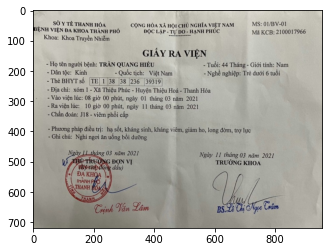

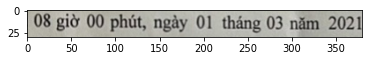

In [85]:
import pickle
import os
os.chdir('../')
import numpy as np
import cv2
from helpers import corner_utils as utlis
from helpers import ocr_helpers as ocr_utils


img = ocr_utils.read_image_from_dir(r'/home/pot/Desktop/web_service/notebook/crop_image.jpg')
crop_image = np.asarray(img)
# edges_image = utlis.edges_det(img)
# edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
# page_contour =  utlis.find_page_contours(edges_image)
# page_contour =  utlis.four_corners_sort(page_contour)
# crop_image = utlis.persp_transform(img, page_contour)
# crop_image = ocr_utils.resize(crop_image)
im_height, im_width = crop_image.shape[:2]
ocr_utils.implt(crop_image)

detections = pickle.load(open('/home/pot/Desktop/web_service/notebook/data_detect.pickle', 'rb')) 
detection_classes = detections['detection_classes']
detection_boxes  = detections['detection_boxes']
detection_scores  = detections['detection_scores']
end = []
y_min, x_min, y_max, x_max  = im_height, im_width, 0, 0 
for i in range(len(detection_classes)):
    if detection_scores[i] <= 0.5:
        continue
    if detection_classes[i] == 8:
        ymin, xmin, ymax, xmax = detection_boxes[i]
        (ymin, xmin, ymax, xmax) = (ymin * im_height, xmin * im_width, ymax * im_height, xmax * im_width)
        if xmin < x_min: x_min = xmin
        if xmax > x_max: x_max = xmax
        if ymin < y_min: y_min = ymin
        if ymax > y_max: y_max = ymax
ocr_utils.implt(img.crop((int(x_min), int(y_min), int(x_max), int(y_max))))

# cv2.imwrite('/home/pot/Desktop/web_service/xxx.jpg',np.asarray(img.crop((int(x_min), int(y_min), int(x_max), int(y_max)))))

In [2]:
def get_id_by_name(name):
    if name == 'name': return 1
    elif name == 'birth': return 2
    elif name == 'sex': return 3
    elif name == 'nation': return 4
    elif name == 'country': return 5
    elif name == 'id': return 6
    elif name == 'add': return 7
    elif name == 'come_time': return 8
    elif name == 'out_time': return 9
    elif name == 'diagnostic': return 10
    elif name == 'solution': return 11
    elif name == 'note': return 12
    elif name == 'job': return 13
    

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
#                      int(root.find('size')[0].text),
#                      int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
#     column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    column_name = ['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    xml_df = xml_df.rename(columns={'filename':'image_name', 'class':'class_id'})
    xml_df['class_id'] = [get_id_by_name(item) for item in xml_df['class_id']]
    return xml_df



my_path_train = './training/data/giay_ra_vien/train_xml/'
my_path_val = './training/data/giay_ra_vien/val_xml/'
newpath = './training/data/giay_ra_vien/annotations/'


xml_df = xml_to_csv(my_path_train)
xml_df.to_csv((newpath + 'giay_ra_vien_train' + '.csv'), index=None)

xml_df = xml_to_csv(my_path_val)
xml_df.to_csv((newpath + 'giay_ra_vien_val' + '.csv'), index=None)

print('Successfully converted xml to csv.')

Successfully converted xml to csv.
